In [1]:
#Ficheiro Python PBCM para realizar os gráficos com os dados do R. PIPELINE DO FRED
!pip install pandas numpy seaborn matplotlib gseapy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gseapy as gp

#Acessar Pastas onde estarão os dados,imagens...
TABLES_FOLDER="C:\\Users\\fmmar\\OneDrive\\Ambiente de Trabalho\\Universidade\\3º Ano\\Projeto LBCM\\data\\gsea\\Tabelas todas a usar no Python"
TABLES_OUT_FOLDER="C:\\Users\\fmmar\\OneDrive\\Ambiente de Trabalho\\Universidade\\3º Ano\\Projeto LBCM\\data\\gsea\\tabelas secundárias geradas no Python"
FIGURES_FOLDER="C:\\Users\\fmmar\\OneDrive\\Ambiente de Trabalho\\Universidade\\3º Ano\\Projeto LBCM\\Imagens\\Geradas no código\\Imagens geradas no Python gsea\\Pacientes 2\\"



In [2]:
###FUNÇÕES QUE VÃO SER NECESSÁRIAS PARA O LOOP

def saveFig(name, folder = FIGURES_FOLDER):
    plt.savefig(folder + name, dpi = 300, bbox_inches = 'tight')


def plot_heatmap(df,type, out_dir = FIGURES_FOLDER):
    sns.set_style("ticks")

    num_rows, num_cols = df.shape

    # Calculate the figsize based on the number of rows and columns
    #figsize = (num_cols * 0.5, num_rows * 0.35)

    #fig = plt.figure(figsize=figsize)

    # Proporções do heatmap (ajuste conforme necessário)
    heatmap_width = num_cols * 0.5  # Largura baseada no número de colunas
    heatmap_height = num_rows * 0.35  # Altura baseada no número de linhas

    # Espaço adicional para as legendas dos eixos
    extra_space_x = 2 # Espaço extra para o eixo x (ajuste conforme necessário)
    extra_space_y = 2  # Espaço extra para o eixo y (ajuste conforme necessário)

    # Tamanho total da figura
    fig_width = heatmap_width + extra_space_x
    fig_height = heatmap_height + extra_space_y

    # Criar a figura com o tamanho ajustado
    fig, ax = plt.subplots(figsize=(fig_width, fig_height))


    sns.heatmap(df, cmap = "RdYlBu_r")


    plt.yticks(rotation=0, fontsize=8)  # yticks na horizontal e com tamanho menor (8)

    # Ajustar o tamanho das xticks
    plt.xticks(fontsize=10)

    #plt.xticks(fontsize=10)
    #plt.yticks(fontsize=9)


    plt.xlabel('Clusters')
    plt.ylabel('PDAC Subtypes')
   
    # Show graphic
    # plt.show()
 
 # Ajustar as margens para evitar cortes
    plt.tight_layout()
    saveFig('{}_enrichment.png'.format(type), folder = out_dir)


def BarPlotGSEA(res_df, n = 10,
                x = 'nes', y= 'Term', stats = 'fdr', sig_only = True,
                title = 'GSEA_Results', xlabel = 'Enrichment Score',
                colors = ['crimson', 'salmon','steelblue','lightblue'], out_dir = FIGURES_FOLDER):
    
    # sort value according to X values selected
    res_df = res_df.sort_values(x, ascending = False)
    
    # add column with sign value according to X values selected
    res_df['direction'] = np.sign(res_df[x])
    
    # add column with significance boolean according to stats columns
    res_df['significant'] = (abs(res_df[stats]) < 0.05).astype('int')
    
    # create label based on direction and significance
    res_df['label'] = res_df['direction'] + res_df['significant']
    res_df['label'] = res_df['label'].map({-1:'nes<0 & fdr>0.05',
                                            0:'nes<0 & fdr<0.05',
                                            1:'nes>0 & fdr>0.05',
                                            2:'nes>0 & fdr<0.05'})
    # select top and bottom hits
    top = res_df.head(n)
    bottom = res_df.tail(n)

    # merge top and bottom hits to plot
    data = pd.concat([top, bottom])
    
    # show only significative results (fdr<0.05)
    
    if sig_only == True:
        data = data[data['significant'] == True]
        
        
    # plotting
    fig, ax = plt.subplots(figsize = (3, data.shape[0]/4), dpi = 150)
    plt.title(title, fontsize = 8)

    sns.barplot(data = data.reset_index(), x = x, y = y, hue = 'label', lw = 0.6, edgecolor = 'black',
                dodge=False, width = 0.7, 
                
                palette={'nes<0 & fdr>0.05':colors[3],
                         'nes<0 & fdr<0.05':colors[2],
                         'nes>0 & fdr>0.05':colors[1],
                         'nes>0 & fdr<0.05':colors[0]})
       
    plt.ylabel('', fontsize = 7); plt.xlabel(xlabel, fontsize = 7);
    plt.yticks(fontsize = 6); plt.xticks(fontsize = 7)

    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.tick_params(axis = 'both', which = 'both', length = 3)

    #remove legend
    ax.legend(frameon=False, fontsize = 5, loc = 2);
    #ax.legend(frameon=False, fontsize = 4, loc = 0, bbox_to_anchor = (1,0.05));

    # adjust x axis
    ax.set_xlim(np.ceil(ax.get_xlim()[0])-1,
                np.ceil(ax.get_xlim()[1])+1);

    ax.vlines(x = 0, ymin = np.ceil(ax.get_ylim()[0]),
                     ymax = np.ceil(ax.get_ylim()[1]-0.5), 
                     lw = 0.6, ls = '-', colors = 'black');
    
    saveFig('{}.png'.format(title), folder = out_dir)
    
    return data


def DotPlotGSEA(res_df, n = 10,
                x = 'NES', y= 'Term', stats = 'FDR q-val', size = 'Gene %', sig_only = True,
                title = 'GSEA Results', xlabel = 'Enrichment Score',
                colors = ['crimson', 'salmon','steelblue','lightblue'],out_dir = FIGURES_FOLDER):
    
    # sort value according to X values selected
    res_df = res_df.sort_values(x, ascending = False)
    
    # add column with sign value according to X values selected
    res_df['direction'] = np.sign(res_df[x])
    
    # add column with significance boolean according to stats columns
    res_df['significant'] = (abs(res_df[stats]) < 0.05).astype('int')
    
    # create label based on direction and significance
    res_df['label'] = res_df['direction'] + res_df['significant']
    res_df['label'] = res_df['label'].map({-1:'NES<0 & FDR>0.05',
                                            0:'NES<0 & FDR<0.05',
                                            1:'NES>0 & FDR>0.05',
                                            2:'NES>0 & FDR<0.05'})
    
        # show only significative results (FDR<0.05)
    
    if sig_only == True:
        res_df = res_df[res_df['significant'] == True]


    # select top and bottom hits
    top = res_df.head(n)
    bottom = res_df.tail(n)

    # merge top and bottom hits to plot
    data = pd.concat([top, bottom])
    
    
    # plotting
    fig, ax = plt.subplots(figsize = (2, data.shape[0]/5), dpi = 150)
    plt.title(title + '\n', fontsize = 8)

    cmap = 'coolwarm'
    sns.scatterplot(data = data, x = x, y = y,
                    hue = np.round(data[stats].astype('float'),3), sizes=(20,40),
                    size = data[size].str.strip('%').astype('float').astype('int'), 
                    lw = 0.8, edgecolor = 'black', palette=cmap, clip_on = False)

    plt.ylabel('', fontsize = 7); plt.xlabel(xlabel, fontsize = 7);
    plt.yticks(fontsize = 6); plt.xticks(fontsize = 7)


    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.tick_params(axis = 'both', which = 'both', length = 3)

    #remove legend
    #ax.legend(frameon=False, fontsize = 5, loc = 2);
    ax.legend(frameon=False, fontsize = 5, loc = 1, bbox_to_anchor = (1.6,1), markerscale = 0.8);


    # adjust x axis
    ax.set_xlim(np.ceil(ax.get_xlim()[0])-1,
                np.ceil(ax.get_xlim()[1]));
    
    ax.vlines(x = 0, ymin = np.ceil(ax.get_ylim()[0]),
                    ymax = np.ceil(ax.get_ylim()[1]-0.5), 
                    lw = 0.6, ls = '-', colors = 'black');

    saveFig('{}.png'.format(title), folder = out_dir)
        
    # return data
    

In [64]:
##LOOP
import os

# Specify the directory
directory = TABLES_FOLDER

# List all .gmt files in the directory
gmt_files = [directory+'\\'+f for f in os.listdir(directory) if f.endswith('.gmt')]

# List all .csv files in the directory
csv_files = [directory+'\\'+f for f in os.listdir(directory) if f.endswith('.csv')]


targets = gmt_files #colocar a lista dos gmt's

order = csv_files #colocar a lista dos clusters (meus)

for t in targets:
    final_df = pd.DataFrame()

    for name in order:
        df=pd.read_csv(name)
        pre_res = gp.prerank(rnk=df, gene_sets=t,
                                                min_size = 5, max_size = 2000, seed = 6,) #corre o gene set enrichment

        results = pre_res.res2d
        
        #results["Term"] = results["Term"].str.replace("_"," ")
        

        
        out = []

        for term in list(pre_res.results):
            out.append([term,
                    pre_res.results[term]['fdr'],
                    pre_res.results[term]['es'],
                    pre_res.results[term]['nes']])

        out_df = pd.DataFrame(out, columns = ['Term','fdr', 'es', 'nes']).sort_values('fdr').reset_index(drop = True)
        out_df["Term"] = out_df["Term"].str.replace("_"," ")
        out_df.set_index("Term", inplace=True)

        GS = t.replace(TABLES_FOLDER,"").replace("_"," ").replace(".gmt","").replace("\\","")
        title=name.replace(TABLES_FOLDER,"").replace("_GSEAscore","").replace("_ "," ").replace(".csv","").replace("\\","").replace("_","")


        terms = pre_res.res2d.Term

        for i in range(len(terms)):
    
           rank_plot = "{} {} GSEA Plot".format(GS,title)
           # axs = pre_res.plot(terms=terms[i])  
           gp.gseaplot(rank_metric=pre_res.ranking, term=terms[i], ofname= rank_plot, **pre_res.results[terms[i]])

            
        
        try:
            BarPlotGSEA(out_df, title="{} {} GSEA Results Bar Plot".format(GS,title))

        except:
            print("Error on barplot for "+ title + " in "+ GS )

        try:
            DotPlotGSEA(results, title="{} {} GSEA Results Dot Plot".format(GS,title))

        except:
            print("Error on dotplot for "+ title + " in "+ GS )
            

        out_df = out_df[out_df["fdr"]<0.05]


         # Ensure no duplicate 'nes' columns during the merge
        merge_suffixes = ('', '_{}'.format(title))  # Adding a unique suffix based on the 'title'

        final_df = pd.merge(final_df, out_df.loc[:, ["nes"]], left_index=True, right_index=True, how='outer', suffixes=merge_suffixes)

  

    final_df.columns = [f.replace(TABLES_FOLDER,"").replace("_GSEAscore","").replace("_ "," ").replace(".csv","").replace("\\","").replace("_","") for f in order]

    try:
        plot_heatmap(final_df,GS +" all")


    except:
        print("Error on heatmap "+GS+ " all")


    num_non_null = final_df.notna().sum(axis=1)

    try: 
        plot_heatmap(final_df[num_non_null >= 2],GS +" filtered")

    except:
        print("Error on heatmap " + GS + " filtered")
        

2025-03-14 14:12:12,910 [WARNING] Duplicated values found in preranked stats: 18.55% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


IndexError: list index out of range

In [80]:
##LOOP
import os

# Specify the directory
directory = TABLES_FOLDER

# List all .gmt files in the directory
gmt_files = [directory+'\\'+f for f in os.listdir(directory) if f.endswith('.gmt')]

# List all .csv files in the directory
csv_files = [directory+'\\'+f for f in os.listdir(directory) if f.endswith('.csv')]


targets = gmt_files #colocar a lista dos gmt's

order = csv_files #colocar a lista dos clusters (meus)

for t in targets:
    final_df = pd.DataFrame()

    for name in order:
        df=pd.read_csv(name)
        pre_res = gp.prerank(rnk=df, gene_sets=t,
                                                min_size = 5, max_size = 2000, seed = 6,) #corre o gene set enrichment

        results = pre_res.res2d
        
        #results["Term"] = results["Term"].str.replace("_"," ")
        

        
        out = []

        for term in list(pre_res.results):
            out.append([term,
                    pre_res.results[term]['fdr'],
                    pre_res.results[term]['es'],
                    pre_res.results[term]['nes']])

        out_df = pd.DataFrame(out, columns = ['Term','fdr', 'es', 'nes']).sort_values('fdr').reset_index(drop = True)
        out_df["Term"] = out_df["Term"].str.replace("_"," ")
        out_df.set_index("Term", inplace=True)

        GS = t.replace(TABLES_FOLDER,"").replace("_"," ").replace(".gmt","").replace("\\","")
        title=name.replace(TABLES_FOLDER,"").replace("_GSEAscore","").replace("_ "," ").replace(".csv","").replace("\\","").replace("_","")


        terms = pre_res.res2d.Term

        for i in range(len(terms)):
    
           rank_plot = FIGURES_FOLDER + "{} {} GSEA Plot.png".format(terms[i],title)
          # axs = pre_res.plot(terms=terms[i])  
           gp.gseaplot(rank_metric=pre_res.ranking, term=terms[i], ofname=rank_plot, **pre_res.results[terms[i]])

2025-03-14 14:20:14,921 [WARNING] Duplicated values found in preranked stats: 18.55% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2025-03-14 14:20:17,368 [WARNING] Duplicated values found in preranked stats: 15.69% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2025-03-14 14:20:20,176 [WARNING] Duplicated values found in preranked stats: 11.07% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2025-03-14 14:20:22,947 [WARNING] Duplicated values found in preranked stats: 4.10% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2025-03-14 14:20:25,805 [WARNING] Duplicated values found in preranked stats: 8.50% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2025-03-14 14:20:28,908 [WARNING] Duplicated values found in preranked stats: 38.95% of genes
The order of those genes wil

2025-03-13 16:09:00,660 [WARNING] Duplicated values found in preranked stats: 13.96% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2025-03-13 16:09:01,107 [WARNING] Duplicated values found in preranked stats: 9.04% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2025-03-13 16:09:01,575 [WARNING] Duplicated values found in preranked stats: 10.99% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2025-03-13 16:09:02,023 [WARNING] Duplicated values found in preranked stats: 22.97% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2025-03-13 16:09:02,529 [WARNING] Duplicated values found in preranked stats: 41.12% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when l

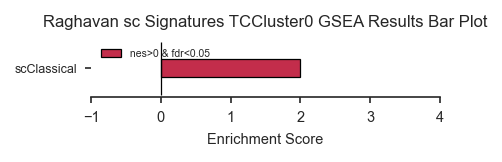

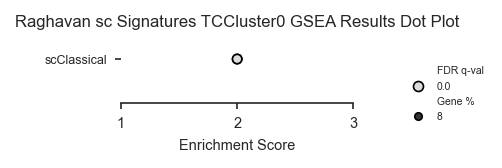

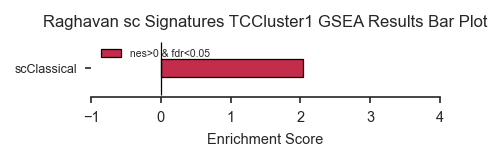

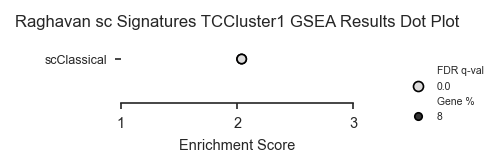

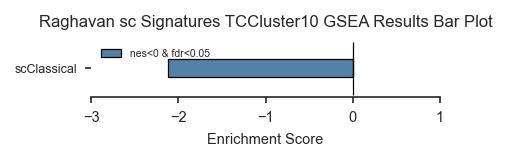

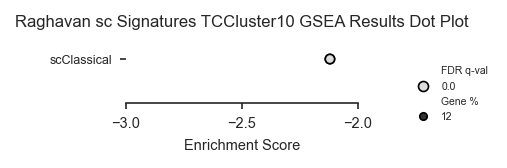

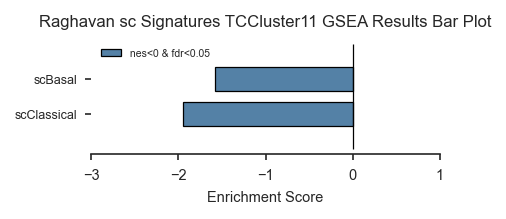

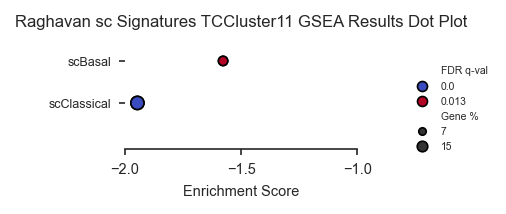

C:\Users\fmmar\anaconda\Lib\site-packages\matplotlib\_tight_bbox.py:67: RuntimeWarning: divide by zero encountered in scalar divide
  fig.patch.set_bounds(x0 / w1, y0 / h1,
C:\Users\fmmar\anaconda\Lib\site-packages\matplotlib\_tight_bbox.py:68: RuntimeWarning: divide by zero encountered in scalar divide
  fig.bbox.width / w1, fig.bbox.height / h1)
C:\Users\fmmar\anaconda\Lib\site-packages\matplotlib\patches.py:743: RuntimeWarning: invalid value encountered in scalar add
  y1 = self.convert_yunits(self._y0 + self._height)
C:\Users\fmmar\anaconda\Lib\site-packages\matplotlib\transforms.py:2039: RuntimeWarning: invalid value encountered in scalar add
  self._mtx[1, 2] += ty


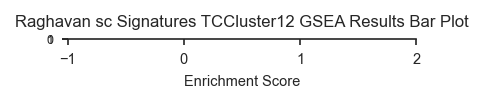

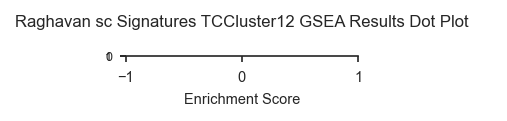

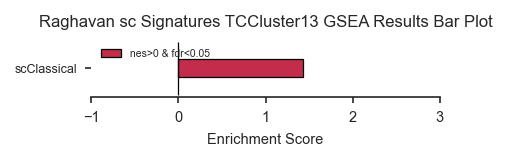

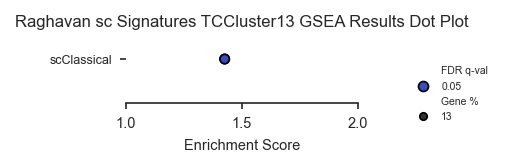

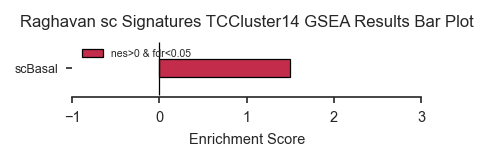

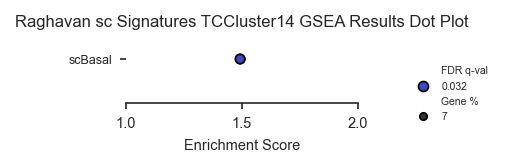

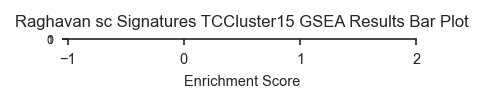

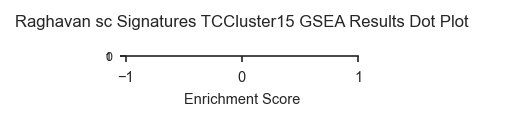

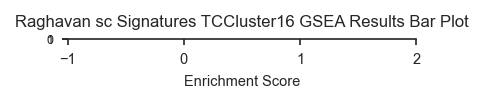

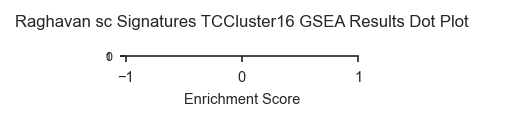

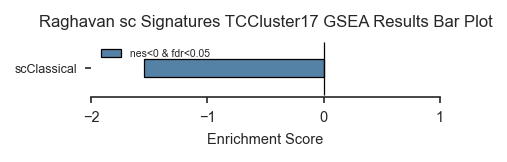

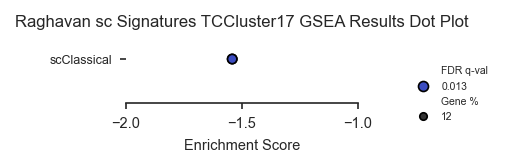

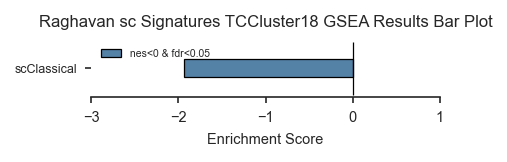

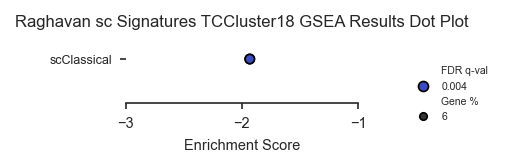

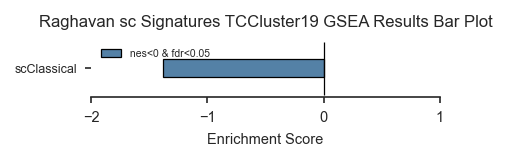

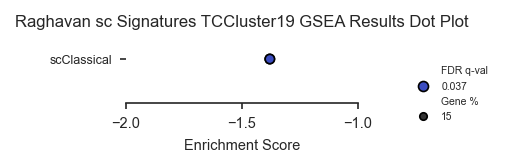

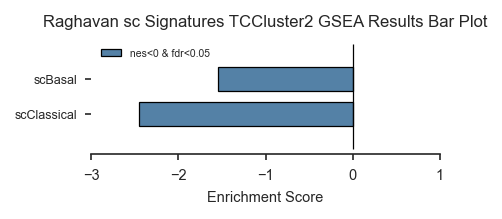

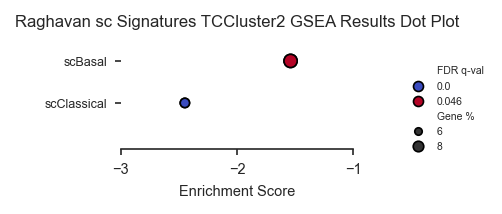

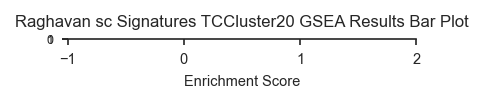

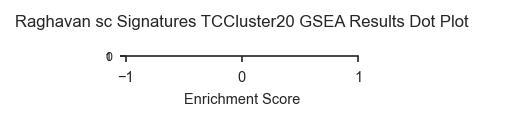

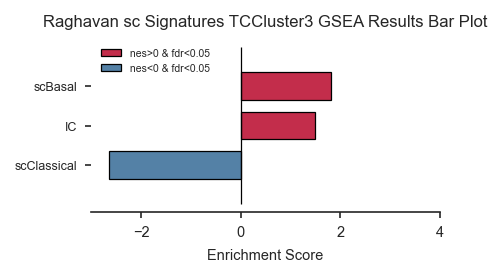

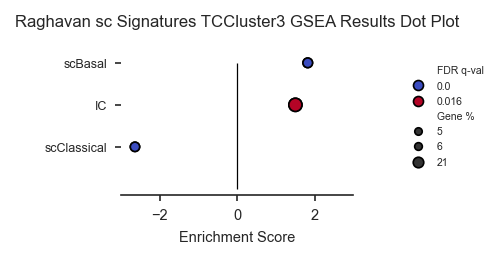

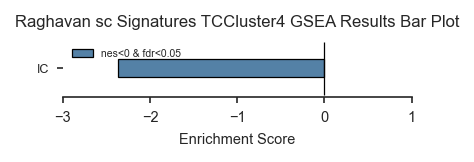

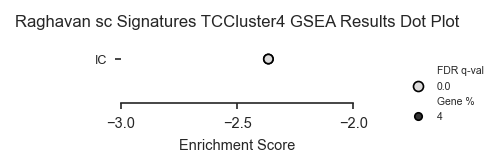

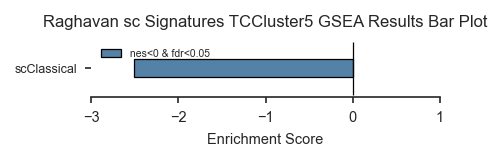

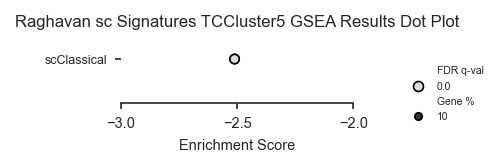

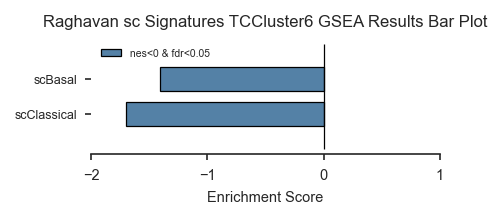

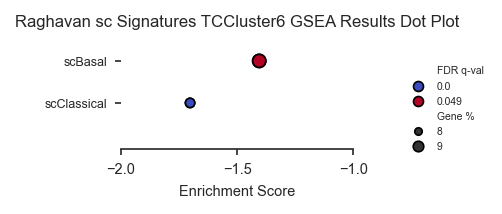

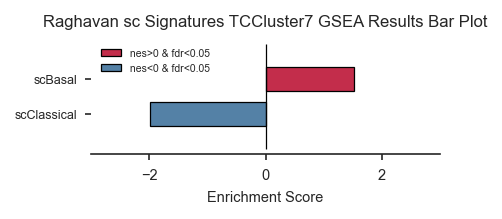

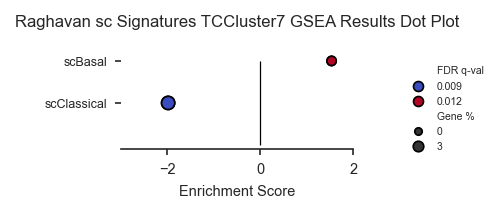

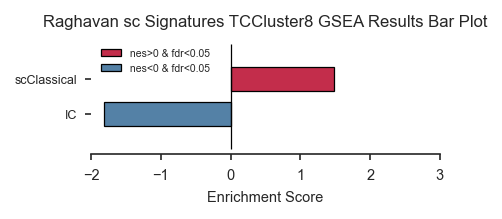

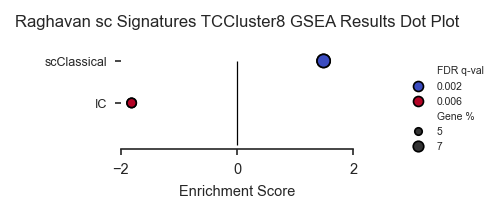

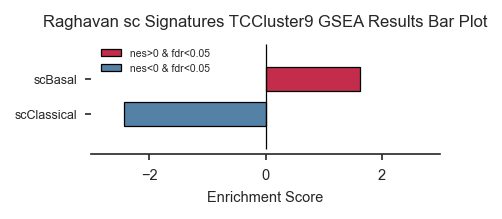

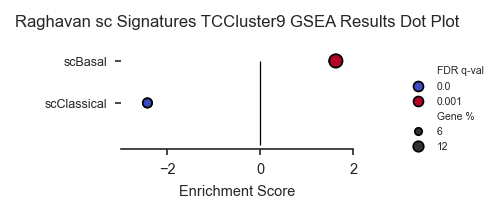

In [139]:
##LOOP ORDENADO
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re  # Para usar expressões regulares e extrair números dos nomes

# Função para plotar o heatmap com colunas ordenadas
def plot_heatmap(df, type, out_dir=FIGURES_FOLDER):
    sns.set_style("ticks")

    # Extrair números dos nomes das colunas
    def extract_number(col_name):
        match = re.search(r'\d+', col_name)  # Procura por números no nome da coluna
        return int(match.group()) if match else 0  # Retorna o número encontrado ou 0 se não houver

    # Ordenar as colunas com base nos números extraídos
    sorted_columns = sorted(df.columns, key=extract_number)
    df_sorted = df[sorted_columns]  # Reordenar o DataFrame

    num_rows, num_cols = df_sorted.shape

    # Proporções do heatmap (ajuste conforme necessário)
    heatmap_width = num_cols * 0.5  # Largura baseada no número de colunas
    heatmap_height = num_rows * 0.35  # Altura baseada no número de linhas

    # Espaço adicional para as legendas dos eixos
    extra_space_x = 2.0  # Espaço extra para o eixo x (ajuste conforme necessário)
    extra_space_y = 1.5  # Espaço extra para o eixo y (ajuste conforme necessário)

    # Tamanho total da figura
    fig_width = heatmap_width + extra_space_x
    fig_height = heatmap_height + extra_space_y

    # Criar a figura com o tamanho ajustado
    fig, ax = plt.subplots(figsize=(fig_width, fig_height))

    # Criar o heatmap com as colunas ordenadas
    sns.heatmap(df_sorted, cmap="RdYlBu_r")

    # Ajustar o tamanho das fontes dos eixos
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=9)

    # Adicionar labels aos eixos
    plt.xlabel('Clusters', fontsize=12)
    plt.ylabel('Populations of mouse cells', fontsize=12)

    # Ajustar as margens para evitar cortes
    plt.tight_layout()

    # Salvar a figura
    saveFig('{}_enrichment.png'.format(type), folder=out_dir)

    # Fechar a figura para liberar memória
    plt.close()

# Specify the directory
directory = TABLES_FOLDER

# List all .gmt files in the directory
gmt_files = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith('.gmt')]

# List all .csv files in the directory
csv_files = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith('.csv')]

targets = gmt_files  # Lista dos arquivos .gmt
order = csv_files    # Lista dos arquivos .csv (clusters)

for t in targets:
    final_df = pd.DataFrame()

    for name in order:
        df = pd.read_csv(name)
        pre_res = gp.prerank(rnk=df, gene_sets=t, min_size=5, max_size=2000, seed=6)  # Executa o GSEA

        results = pre_res.res2d
        results["Term"] = results["Term"].str.replace("_", " ")

        out = []
        for term in list(pre_res.results):
            out.append([term, pre_res.results[term]['fdr'], pre_res.results[term]['es'], pre_res.results[term]['nes']])

        out_df = pd.DataFrame(out, columns=['Term', 'fdr', 'es', 'nes']).sort_values('fdr').reset_index(drop=True)
        out_df["Term"] = out_df["Term"].str.replace("_", " ")
        out_df.set_index("Term", inplace=True)

        GS = t.replace(TABLES_FOLDER, "").replace("_", " ").replace(".gmt", "").replace("\\", "")
        title = name.replace(TABLES_FOLDER, "").replace("_GSEAscore", "").replace("_ ", " ").replace(".csv", "").replace("\\", "").replace("_", "")

        try:
            BarPlotGSEA(out_df, title="{} {} GSEA Results Bar Plot".format(GS, title))
        except Exception as e:
            print("Error on barplot for " + title + " in " + GS + ": " + str(e))

        try:
            DotPlotGSEA(results, title="{} {} GSEA Results Dot Plot".format(GS, title))
        except Exception as e:
            print("Error on dotplot for " + title + " in " + GS + ": " + str(e))

        out_df = out_df[out_df["fdr"] < 0.05]

        # Garante que não haja colunas 'nes' duplicadas durante o merge
        merge_suffixes = ('', '_{}'.format(title))  # Adiciona um sufixo único baseado no 'title'
        final_df = pd.merge(final_df, out_df.loc[:, ["nes"]], left_index=True, right_index=True, how='outer', suffixes=merge_suffixes)

    final_df.columns = [f.replace(TABLES_FOLDER, "").replace("_GSEAscore", "").replace("_ ", " ").replace(".csv", "").replace("\\", "").replace("_", "") for f in order]

    try:
        plot_heatmap(final_df, GS + " all")
    except Exception as e:
        print("Error on heatmap " + GS + " all: " + str(e))

    num_non_null = final_df.notna().sum(axis=1)

    try:
        plot_heatmap(final_df[num_non_null >= 2], GS + " filtered")
    except Exception as e:
        print("Error on heatmap " + GS + " filtered: " + str(e))
        

2025-03-13 16:22:23,222 [WARNING] Duplicated values found in preranked stats: 13.96% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2025-03-13 16:22:24,873 [WARNING] Duplicated values found in preranked stats: 9.04% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2025-03-13 16:22:25,510 [WARNING] Duplicated values found in preranked stats: 10.99% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2025-03-13 16:22:26,083 [WARNING] Duplicated values found in preranked stats: 22.97% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2025-03-13 16:22:26,723 [WARNING] Duplicated values found in preranked stats: 41.12% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when l

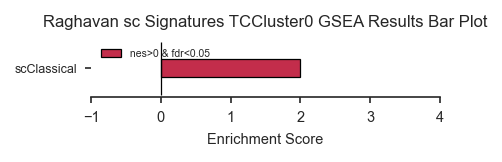

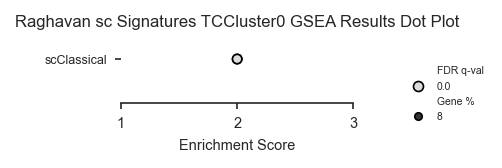

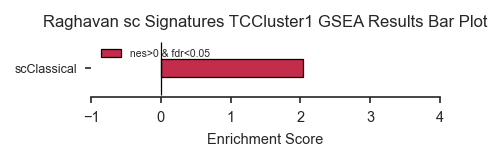

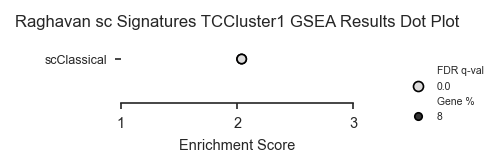

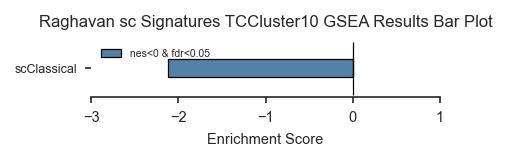

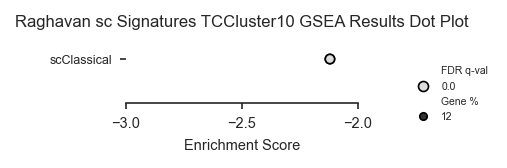

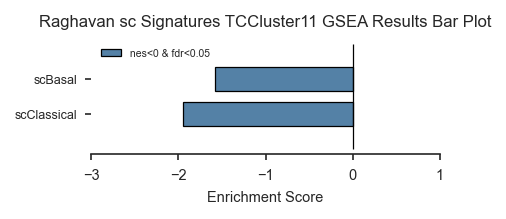

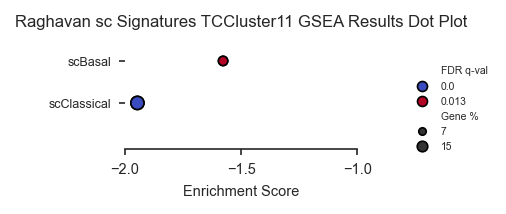

C:\Users\fmmar\anaconda\Lib\site-packages\matplotlib\_tight_bbox.py:67: RuntimeWarning: divide by zero encountered in scalar divide
  fig.patch.set_bounds(x0 / w1, y0 / h1,
C:\Users\fmmar\anaconda\Lib\site-packages\matplotlib\_tight_bbox.py:68: RuntimeWarning: divide by zero encountered in scalar divide
  fig.bbox.width / w1, fig.bbox.height / h1)
C:\Users\fmmar\anaconda\Lib\site-packages\matplotlib\patches.py:743: RuntimeWarning: invalid value encountered in scalar add
  y1 = self.convert_yunits(self._y0 + self._height)
C:\Users\fmmar\anaconda\Lib\site-packages\matplotlib\transforms.py:2039: RuntimeWarning: invalid value encountered in scalar add
  self._mtx[1, 2] += ty


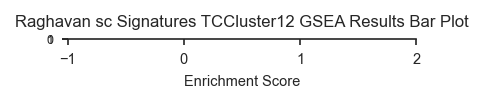

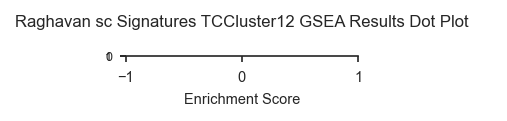

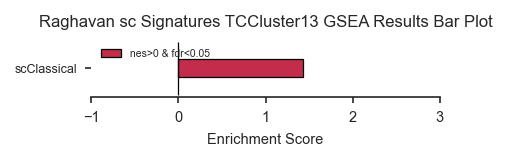

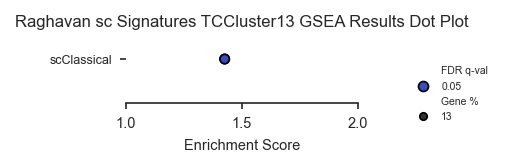

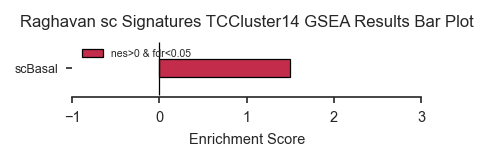

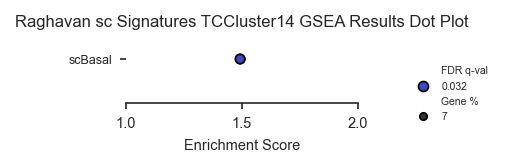

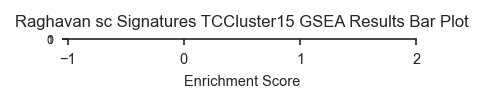

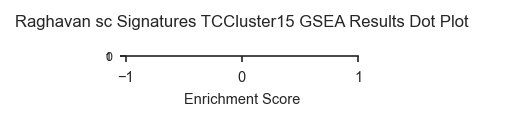

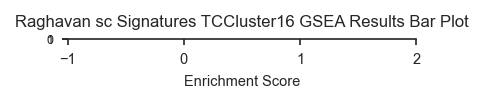

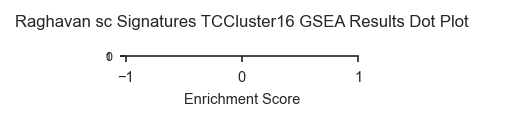

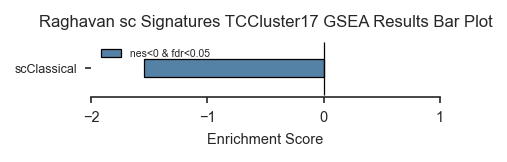

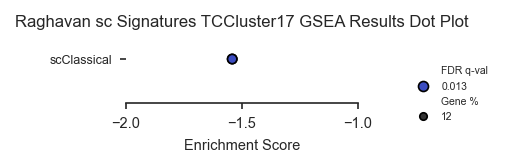

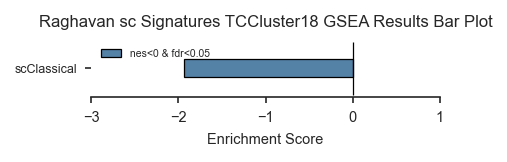

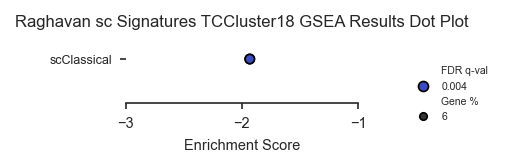

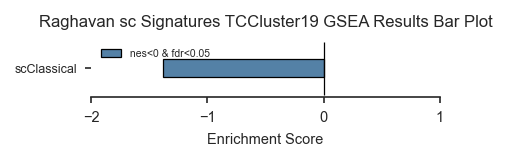

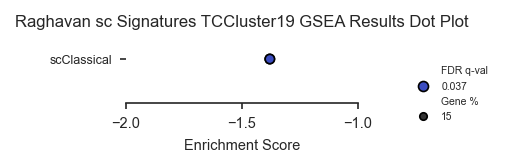

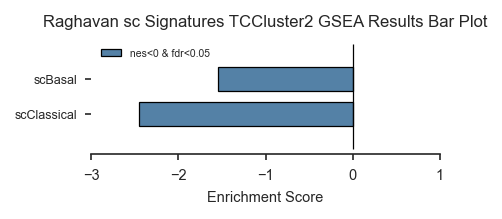

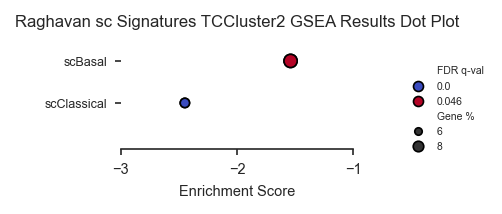

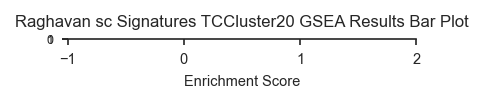

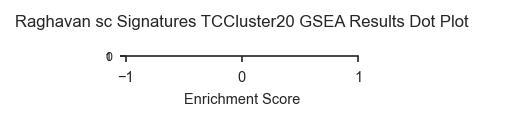

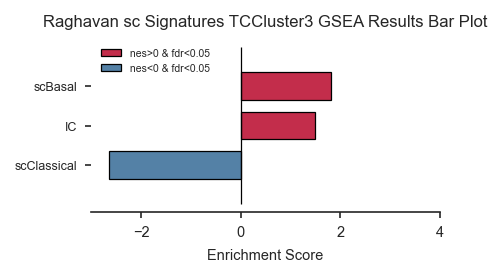

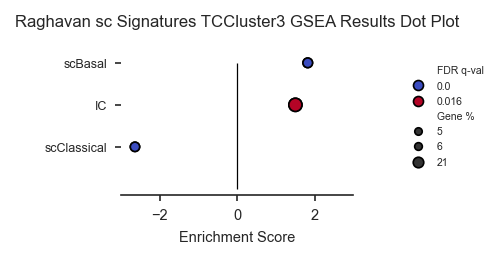

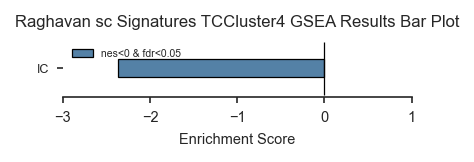

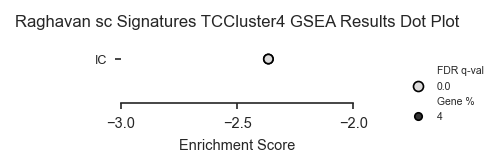

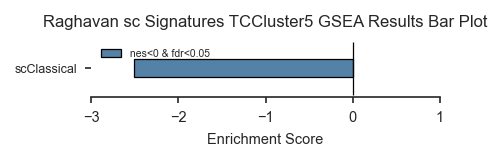

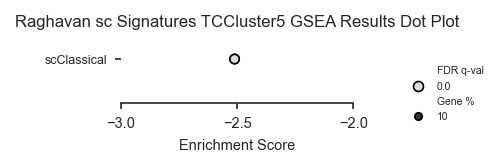

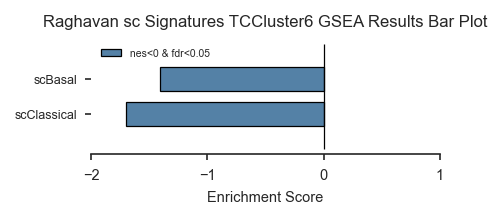

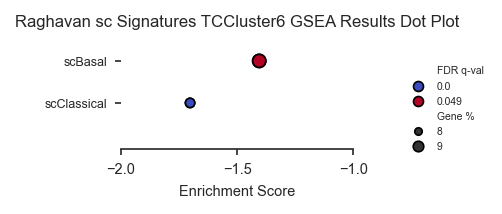

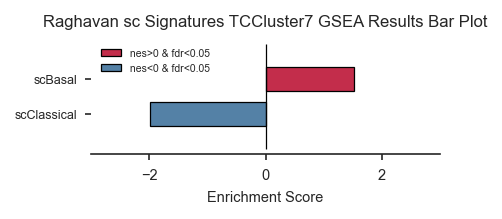

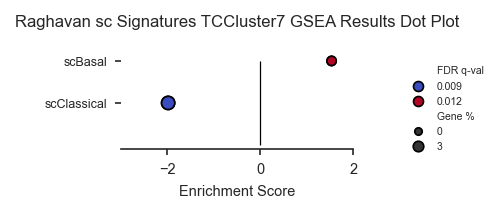

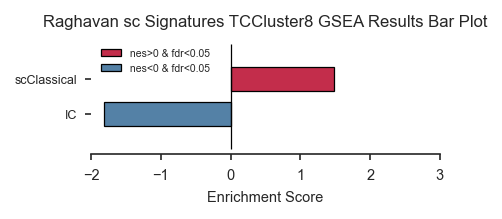

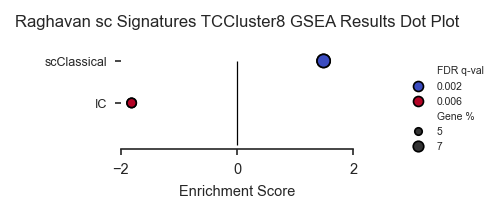

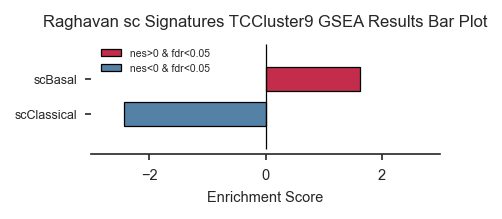

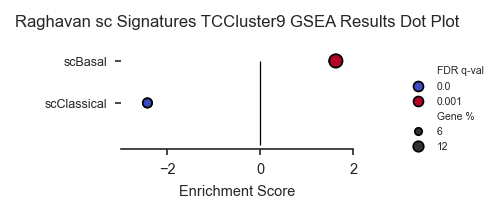

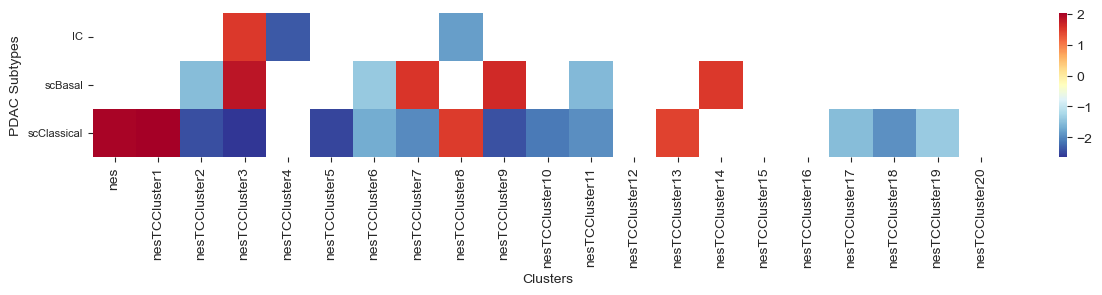

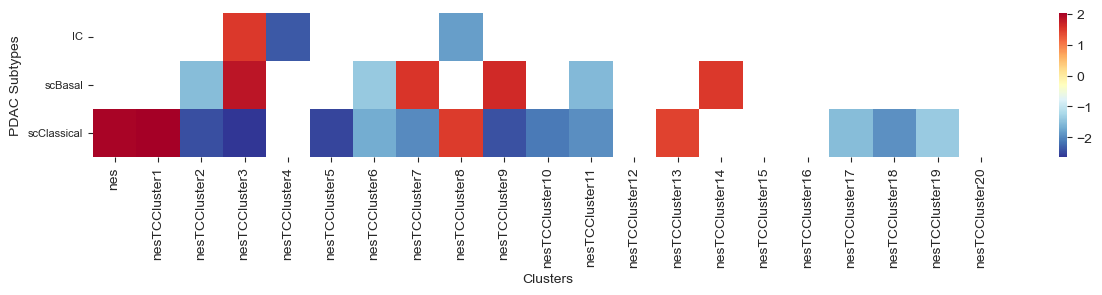

2025-03-13 13:46:29,627 [WARNING] Duplicated values found in preranked stats: 13.96% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2025-03-13 13:46:31,556 [WARNING] Duplicated values found in preranked stats: 9.04% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2025-03-13 13:46:33,540 [WARNING] Duplicated values found in preranked stats: 10.99% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2025-03-13 13:46:34,130 [WARNING] Duplicated values found in preranked stats: 22.97% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2025-03-13 13:46:34,701 [WARNING] Duplicated values found in preranked stats: 41.12% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2025-03-13 13:46:35,243 [WARNING] Duplicated values found in preranked stats: 17.23% of genes
The order of those genes wi

In [7]:
print(f"pandas: {pd.__version__}")
print(f"seaborn: {sns.__version__}")
print(f"gseapy: {gp.__version__}")



pandas: 2.2.2
seaborn: 0.13.2
gseapy: 1.1.5
